# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.


2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [206]:
hp = pd.read_csv('/Users/gracesaunders/Documents/GitHub/linearModels/lab/data/pierce_county_house_sales.csv')
hp.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [207]:
var = 'sale_date'
hp[var].describe()


count          16814
unique           362
top       2020-07-28
freq             109
Name: sale_date, dtype: object

In [208]:
hp[var] = pd.to_datetime(hp[var])
hp[var].describe()

count                            16814
mean     2020-07-16 13:34:32.986796544
min                2020-01-01 00:00:00
25%                2020-04-27 00:00:00
50%                2020-07-27 00:00:00
75%                2020-10-09 00:00:00
max                2020-12-31 00:00:00
Name: sale_date, dtype: object

<Axes: xlabel='sale_date', ylabel='sale_price'>

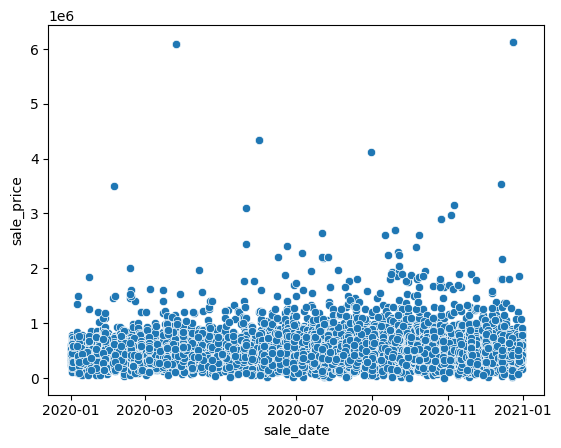

In [209]:
# once converted to datetime, .describe() shows the min and max dates - all within the same year, so probably not an issue
# but also not a great variable to use for prediction
# curious about the distribution of sale prices by time of year though so let's plot that
sns.scatterplot(data=hp, x='sale_date', y='sale_price')
# no noticeable pattern so I'm moving on

In [210]:
var = 'house_square_feet'
hp[var].describe()

count    16814.000000
mean      1879.941953
std        760.419008
min          1.000000
25%       1320.000000
50%       1774.000000
75%       2352.000000
max       9510.000000
Name: house_square_feet, dtype: float64

In [211]:
# min is 1 sq ft, which is odd
print(hp[hp[var] == 1])
# this seems like a data entry error/mistake, so dropping it
hp.drop(hp[hp[var] == 1].index, inplace=True)

      sale_date  sale_price  house_square_feet  attic_finished_square_feet  \
1506 2020-01-27     1086000                  1                           0   

      basement_square_feet  attached_garage_square_feet  \
1506                   384                          440   

      detached_garage_square_feet  fireplaces    hvac_description  \
1506                            0           0  Electric Baseboard   

                    exterior interior  stories     roof_cover  year_built  \
1506  Masonry Concrete Block  Drywall        1  Built Up Rock        1966   

      bedrooms  bathrooms waterfront_type view_quality           utility_sewer  
1506         0          1             NaN   View Avg +  SEWER/SEPTIC INSTALLED  


<Axes: xlabel='house_square_feet', ylabel='Count'>

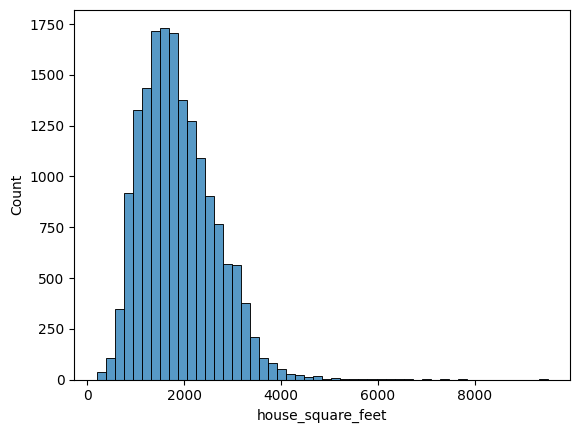

In [212]:
# the new min is 200, which also seems low but isn't impossible so I want to look at the distribution
sns.histplot(data=hp, x=var, bins=50)
# looks like a fairly normal distribution, but with a long right tail


<Axes: xlabel='house_square_feet'>

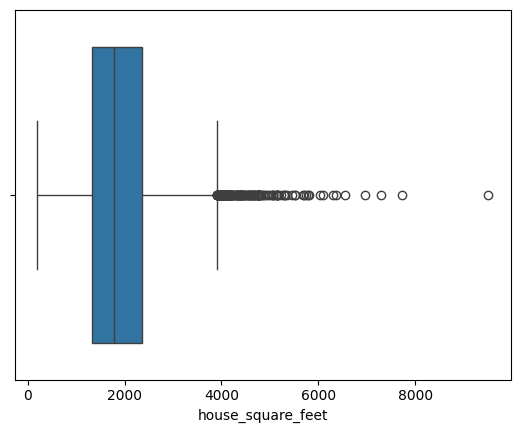

In [213]:
sns.boxplot(data=hp, x=var)
# there are quite a few outliers - the second whisker is at approximately 4000 sq ft, and the max is over twice that


<Axes: xlabel='log_sqft', ylabel='Count'>

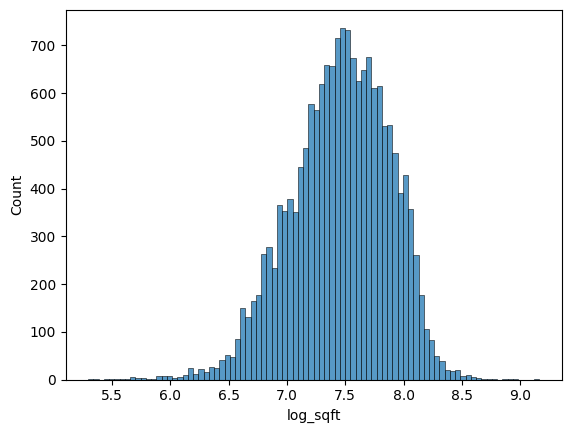

In [214]:
# for this one, I want to use it in my regression but I also don't want to include the huge houses in the model
# so I'm going to use a log transformation to reduce the impact of the right skew
hp['log_sqft'] = np.log(hp['house_square_feet'])
sns.histplot(data=hp, x='log_sqft')
# this looks much better - now it looks like a fairly normal distribution

<Axes: xlabel='log_sqft', ylabel='sale_price'>

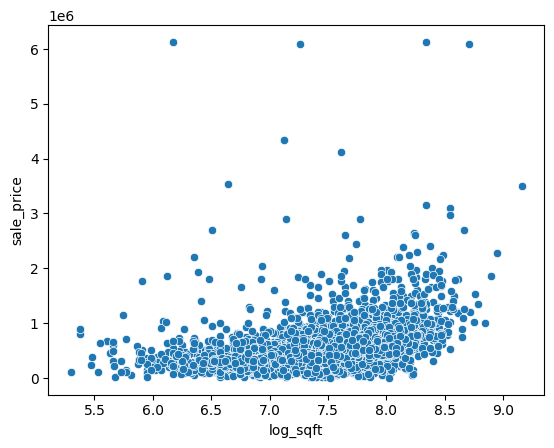

In [215]:
# let's look at the correlation with sale price
var = 'log_sqft'
sns.scatterplot(data=hp, x=var, y='sale_price')

<Axes: xlabel='log_sqft', ylabel='Density'>

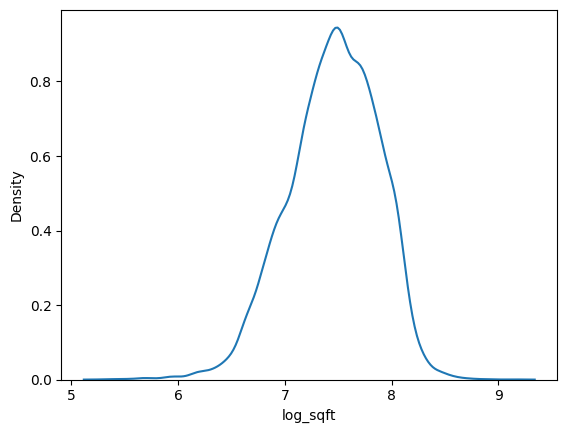

In [216]:
sns.kdeplot(data=hp, x=var)

In [217]:
extra_space = ['attic_finished_square_feet', 'basement_square_feet', 'attached_garage_square_feet', 'detached_garage_square_feet']
hp[extra_space].describe()

,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet
count,16813.000000,16813.000000,16813.000000,16813.000000
mean,24.947362,167.840005,364.420627,38.300779
std,102.069271,429.075355,286.461944,164.696104
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,420.000000,0.000000
75%,0.000000,0.000000,528.000000,0.000000
max,1212.000000,4000.000000,2816.000000,3664.000000


In [218]:
hp['fireplaces'].describe()

count    16813.000000
mean         0.889074
std          0.596710
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: fireplaces, dtype: float64

In [219]:
# the columns with missing values (from data wrangler view) are hvac_description, exterior, interior, and roof_cover
# each column is missing <1% of the data, so I'm going to drop those rows
hp.drop(hp[hp['hvac_description'].isna()].index, inplace=True)
hp.drop(hp[hp['exterior'].isna()].index, inplace=True)
hp.drop(hp[hp['interior'].isna()].index, inplace=True)
hp.drop(hp[hp['roof_cover'].isna()].index, inplace=True)


In [220]:
var = 'hvac_description'
hp[var].value_counts()

hvac_description
Forced Air                10379
Electric Baseboard         2664
Heat Pump                  2082
Warm and Cool Air Zone     1268
Floor/Wall Furnace          174
Hot Water Baseboard         146
No Heat                      80
Electric                      2
Floor Wall Furnace            1
Name: count, dtype: int64

/var/folders/rs/40ldjcbs0ks2l9sptdb8835c0000gn/T/ipykernel_8713/2802662798.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=hp, x='sale_price', hue = var)


<Axes: xlabel='sale_price', ylabel='Density'>

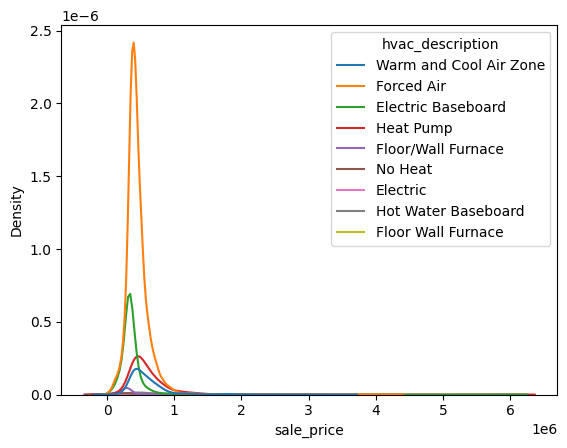

In [221]:
sns.kdeplot(data=hp, x='sale_price', hue = var)

In [232]:
dummies = pd.get_dummies(hp, columns=['hvac_description'], drop_first=True)
dummies.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,exterior,interior,...,utility_sewer,log_sqft,hvac_description_Electric Baseboard,hvac_description_Floor Wall Furnace,hvac_description_Floor/Wall Furnace,hvac_description_Forced Air,hvac_description_Heat Pump,hvac_description_Hot Water Baseboard,hvac_description_No Heat,hvac_description_Warm and Cool Air Zone
0,2020-01-02,380000,2157,0,0,528,0,0,Frame Siding,Drywall,...,SEWER/SEPTIC INSTALLED,7.676474,False,False,False,False,False,False,False,True
1,2020-01-02,383000,2238,0,0,396,0,0,Frame Siding,Drywall,...,SEWER/SEPTIC INSTALLED,7.713338,False,False,False,True,False,False,False,False
2,2020-01-01,419900,1452,0,0,0,0,1,Frame Siding,Drywall,...,SEWER/SEPTIC INSTALLED,7.280697,False,False,False,True,False,False,False,False
3,2020-01-02,251660,832,0,0,0,0,0,Frame Vinyl,Drywall,...,SEWER/SEPTIC INSTALLED,6.723832,False,False,False,True,False,False,False,False
4,2020-01-02,500000,1780,0,384,484,0,1,Frame Siding,Drywall,...,SEWER/SEPTIC INSTALLED,7.484369,False,False,False,True,False,False,False,False


In [234]:
dummies = pd.get_dummies(hp, columns=['exterior'], drop_first=True)
dummies = pd.get_dummies(hp, columns=['interior'], drop_first=True)

In [235]:
dummies.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer,log_sqft,interior_Paneling
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED,7.676474,False
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED,7.713338,False
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED,7.280697,False
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED,6.723832,False
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED,7.484369,False


In [230]:
hp.describe()
hp.isna().sum()

sale_date                          0
sale_price                         0
house_square_feet                  0
attic_finished_square_feet         0
basement_square_feet               0
attached_garage_square_feet        0
detached_garage_square_feet        0
fireplaces                         0
hvac_description                   0
exterior                           0
interior                           0
stories                            0
roof_cover                         0
year_built                         0
bedrooms                           0
bathrooms                          0
waterfront_type                16218
view_quality                   15852
utility_sewer                      0
log_sqft                           0
dtype: int64

<Axes: xlabel='stories', ylabel='sale_price'>

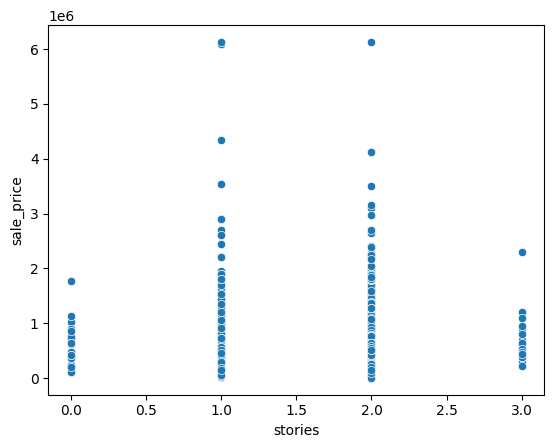

In [226]:
var = 'stories'
sns.scatterplot(data=hp, x=var, y='sale_price')

<Axes: xlabel='stories', ylabel='sale_price'>

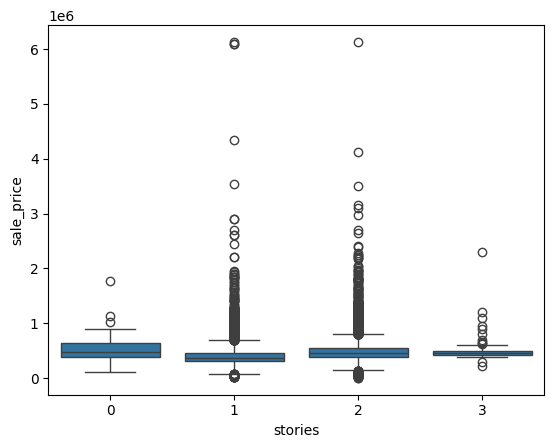

In [227]:
sns.boxplot(data=hp, x=var, y='sale_price')

In [228]:
# it's interesting that 3 story houses are cheapter than 2 story houses, and I also don't know what a 0 story house is
hp[var].value_counts()
# there aren't many 0 story houses compared to the overall dataset
# so I'm thinking this may have been a data entry error or a weird imputation for missing values
# and I'm going to drop them
hp.drop(hp[hp['stories'] == 0].index, inplace=True)

In [229]:
dummias = pd.get_dummies(hp, columns=['roof_cover'], drop_first=True)

In [194]:
hp['waterfront_type'].fillna('Not_Waterfront', inplace=True)
d_water = pd.get_dummies(hp, columns=['waterfront_type'], drop_first=True)  


/var/folders/rs/40ldjcbs0ks2l9sptdb8835c0000gn/T/ipykernel_8713/2775265273.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hp['waterfront_type'].fillna('Not_Waterfront', inplace=True)


In [195]:
# view quality is 95% missing (from data wrangler view), so I'm not going to use it in my model 
var = 'utility_sewer'
hp[var].value_counts()

utility_sewer
SEWER/SEPTIC INSTALLED    16720
SEWER/SEPTIC NO              21
SEWER/SEPTIC AVAIL           21
SEWER AVAILABLE               3
SEWER/SEPTIC NO PERC          1
Name: count, dtype: int64

/var/folders/rs/40ldjcbs0ks2l9sptdb8835c0000gn/T/ipykernel_8713/3240098208.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=hp[hp[var]!='SEWER/SEPTIC INSTALLED'], x='sale_price', hue = var)


<Axes: xlabel='sale_price', ylabel='Density'>

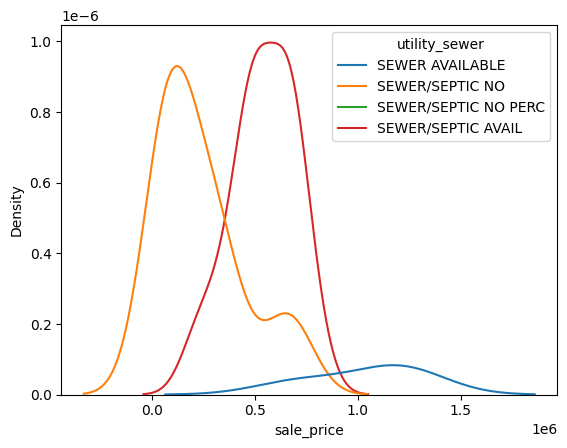

In [196]:
# this one doesn't seem to be very useful either - even though there's no missing data, >99% of the houses have sewer/septic installed
# i'm also assuming that avail and available are the same thing, and it's unclear what no perc means
# i want to check the distribution of sale prices by this variable before deciding to drop it
sns.kdeplot(data=hp[hp[var]!='SEWER/SEPTIC INSTALLED'], x='sale_price', hue = var)

<Axes: xlabel='sale_price', ylabel='Density'>

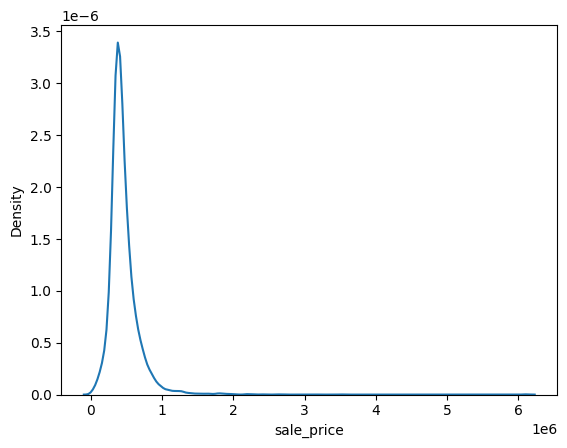

In [197]:
sns.kdeplot(data=hp, x='sale_price')

<Axes: xlabel='log_sale_price', ylabel='Density'>

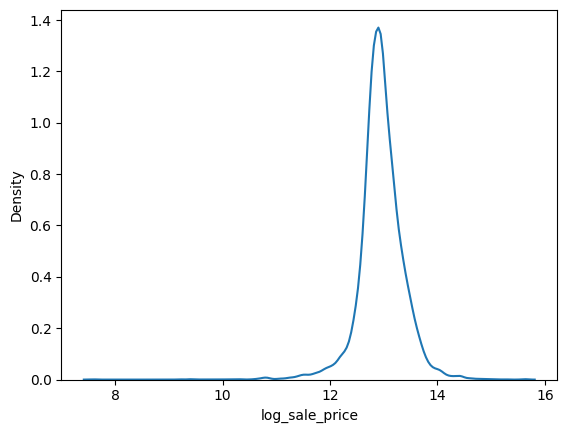

In [198]:
# also, it's clear from all the other plots that sale_price (the target variable) is not normally distributed and is extremely right skewed
# so I'm going to log transform it as well
hp['log_sale_price'] = np.log(hp['sale_price'])
sns.kdeplot(data=hp, x='log_sale_price')
# i'm going to keep this variable, but I want to see how a model does with the original and with the log transformed version

In [199]:
# now that the data is cleaned, I want to concatenate all the variables i'm using into one dataframe
model_vars = ['log_sqft', 'fireplaces', 'stories', 'year_built', 'bedrooms', 'bathrooms',
               'attic_finished_square_feet','basement_square_feet', 'attached_garage_square_feet', 'detached_garage_square_feet']
vars = hp.loc[:, model_vars]
vars.head()

,log_sqft,fireplaces,stories,year_built,bedrooms,bathrooms,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet
0,7.676474,0,2,1993,3,3,0,0,528,0
1,7.713338,0,2,2017,4,3,0,0,396,0
2,7.280697,1,1,1965,3,2,0,0,0,0
3,6.723832,0,1,1919,2,1,0,0,0,0
4,7.484369,1,1,1955,3,2,0,384,484,0


In [200]:
X = pd.concat([vars, d_hvac, d_ext, d_int, d_roof, d_water], axis=1)
X.head()

,log_sqft,fireplaces,stories,year_built,bedrooms,bathrooms,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,...,year_built,bedrooms,bathrooms,view_quality,utility_sewer,log_sqft,waterfront_type_WF Lake,waterfront_type_WF River,waterfront_type_WF Salt,waterfront_type_WF Stream/Creek
0,7.676474,0.0,2.0,1993.0,3.0,3.0,0.0,0.0,528.0,0.0,...,1993.0,3.0,3.0,NaN,SEWER/SEPTIC INSTALLED,7.676474,False,False,False,False
1,7.713338,0.0,2.0,2017.0,4.0,3.0,0.0,0.0,396.0,0.0,...,2017.0,4.0,3.0,NaN,SEWER/SEPTIC INSTALLED,7.713338,False,False,False,False
2,7.280697,1.0,1.0,1965.0,3.0,2.0,0.0,0.0,0.0,0.0,...,1965.0,3.0,2.0,NaN,SEWER/SEPTIC INSTALLED,7.280697,False,False,False,False
3,6.723832,0.0,1.0,1919.0,2.0,1.0,0.0,0.0,0.0,0.0,...,1919.0,2.0,1.0,NaN,SEWER/SEPTIC INSTALLED,6.723832,False,False,False,False
4,7.484369,1.0,1.0,1955.0,3.0,2.0,0.0,384.0,484.0,0.0,...,1955.0,3.0,2.0,NaN,SEWER/SEPTIC INSTALLED,7.484369,False,False,False,False


3. Implement an ~80/~20 train-test split. Put the test data aside.

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?


5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 


6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?


7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?


8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.